# Boston House Price DataSet

***

Intro

***

In [16]:
# The packages we will be using are as follows:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (12, 8)

In [227]:
#we can also import the dataset as it is available in sklearn
from sklearn.datasets import load_boston          #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [228]:
#by opening the data array, the location is diplaed as filename': 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv' which we can instead pull directly into a pandas DF. 

In [286]:
df0 = pd.read_csv('C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv') #or boston['data'] could be used
df1 = pd.DataFrame(df0.values[1:], columns=df0.iloc[0]) # move the 'feature_names' title row to become the Pandas df title   #source: https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe
df = df1.astype(float)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [248]:
#df.isnull().sum()    # will also check if there are any NaN's in each column, here there are not

In [249]:
round(df.describe(), 3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


---
By calling `boston['feature_names'])` we confirm the titles for each of the columns.

Furthermore, using `boston['DESCR']` gives us the description of each feature. 

A summary is presented below:


1. **CRIM**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- per capita crime rate by town 
+ **ZN**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of residential land zoned for lots over 25,000 sq.ft.       
+ **INDUS**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of non-retail business acres per town
+ **CHAS**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)      
+ **NOX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- nitric oxides concentration (parts per 10 million)
+ **RM**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- average number of rooms per dwelling
+ **AGE**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of owner-occupied units built prior to 1940       
+ **DIS**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- weighted distances to five Boston employment centres        
+ **RAD**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- index of accessibility to radial highways 
+ **TAX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- full-value property-tax rate per \$10,000      
+ **PTRATIO**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- pupil-teacher ratio by town   
+ **B**        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town       
+ **LSTAT**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- % lower status of the population
+ **MEDV**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Median value of owner-occupied homes in $1000's  

Reviewing the data presented above, I can see that the key features we are interested in during this review are displayed. The MEDV (the mean vlue of the homes) and CHAS (the data documenting which homes are by the Charles river) will be particularly relevant to us.


The CHAS is a binary data set meaning that there is only 2 possible entries, '1' if the house is by the river and '0'' if it is not. This immediately presents an opportunity for us to split the data into 2 groups to compare. 

In [250]:
df_chas = df1.iloc[:,3].str.contains('1', regex=False)
df_chas1 = pd.concat([df['MEDV'], df_chas], axis=1, sort=False)
df_chas1

chas_t = ((df_chas1[df_chas1['CHAS'] == True]).drop(['CHAS'], axis=1))
chas_f = (df_chas1[df_chas1['CHAS'] == False]).drop(['CHAS'], axis=1)

print('The number of properties by the Charles River are', len(df_chas_t), 'from 506. This set is now called chas_t')
print('')
print('The number of properties NOT by the Charles River are', len(df_chas_f),  'from 506. This set is now called chas_f')

The number of properties by the Charles River are 35 from 506. This set is now called chas_t

The number of properties NOT by the Charles River are 471 from 506. This set is now called chas_f


In [318]:
print('The maximum price from the sample of houses close to the river is',chas_t['MEDV'].max(),'and minimum', chas_t['MEDV'].min(),'. The mean price is', chas_t['MEDV'].mean(), 'while the median is', chas_t['MEDV'].median())
print()
print('The maximum price from the sample of houses close to the river is',chas_f['MEDV'].max(),'and minimum', chas_f['MEDV'].min(),'. The mean price is', round(chas_f['MEDV'].mean(),2), 'while the median is', chas_f['MEDV'].median())
print ()

The maximum price from the sample of houses close to the river is 50.0 and minimum 13.4 . The mean price is 28.44 while the median is 23.3

The maximum price from the sample of houses close to the river is 50.0 and minimum 5.0 . The mean price is 22.09 while the median is 20.9



In [251]:
ss.ttest_ind(chas_t, chas_f)

Ttest_indResult(statistic=array([3.99643747]), pvalue=array([7.39062317e-05]))

The ttest between the 2 groups asks the question, what is the probability that the 2 sample groups are from the same overall population. In this case the pvalue is extremely low and indicates that the the 3 groups are indeed different. 

(array([5., 4., 9., 5., 1., 4., 0., 0., 1., 6.]),
 array([13.4 , 17.06, 20.72, 24.38, 28.04, 31.7 , 35.36, 39.02, 42.68,
        46.34, 50.  ]),
 <a list of 10 Patch objects>)

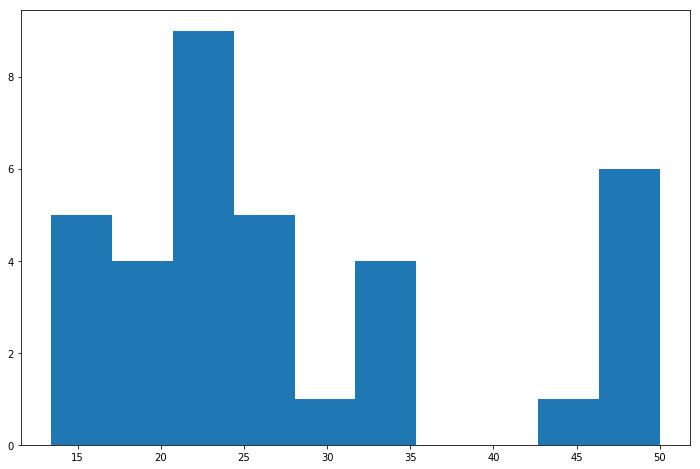

In [326]:
plt.hist(chas_t.values)

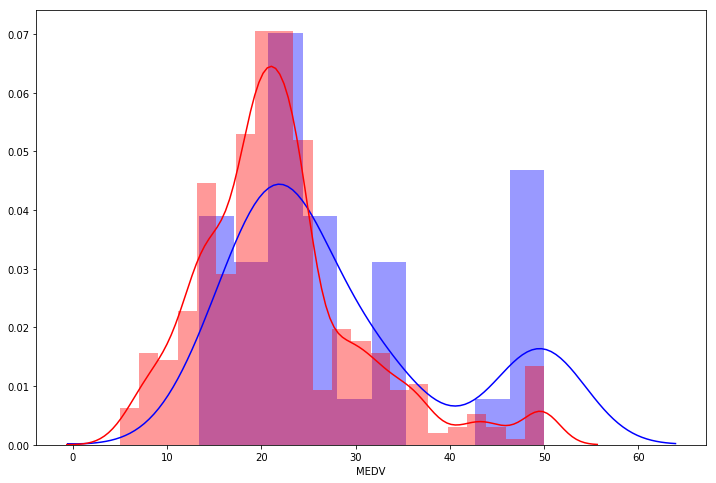

In [348]:
sns.distplot(chas_t, color='b', axlabel='MEDV', bins=10) # houses close to the river are in red
sns.distplot(chas_f, color='r') # houses farther from the river are in red
#sns.distplot(df['MEDV'], color='k') # houses farther from the river are in red


## is the issue here that the mean of the polulations is actually the same or close?

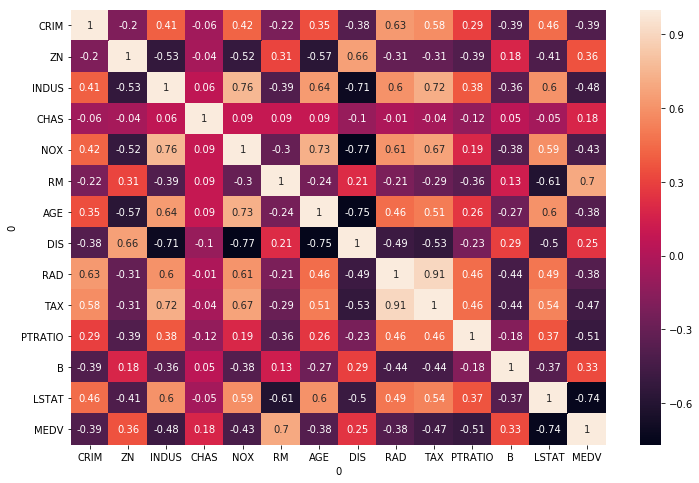

In [351]:
correlation_matrix = df.corr().round(2) # https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

MEDV is a curious feature as it appears to be a total value for the property not taking into account for the size of it. After location, the size or quality of the building are surely the biggest factors influencing price. 

As we do have a column that is an inidicator of size, the average number of rooms per dwelling (RM), I will divice the total price by the average number of rooms to get an indicative square metre price. 

In [311]:
df_sm = df.filter(items=['CHAS', 'RM','MEDV'])
df_sm2 = df_sm.RM * df_sm.MEDV
df_sm3 = pd.concat([df_sm, df_sm2], axis=1, sort=False).drop(['RM', 'MEDV'], axis=1)
df_sm3.columns = ('CHAS', 'SME') #SME for Square Metre estimate
#df_sm3

sme_t = (df_sm3[df_sm3['CHAS'] == 0].drop(['CHAS'], axis=1))
sme_f = (df_sm3[df_sm3['CHAS'] == 1].drop(['CHAS'], axis=1))


In [312]:
ss.ttest_ind(sme_t, sme_f)

Ttest_indResult(statistic=array([-3.72930475]), pvalue=array([0.0002138]))

P value is still not close enough 

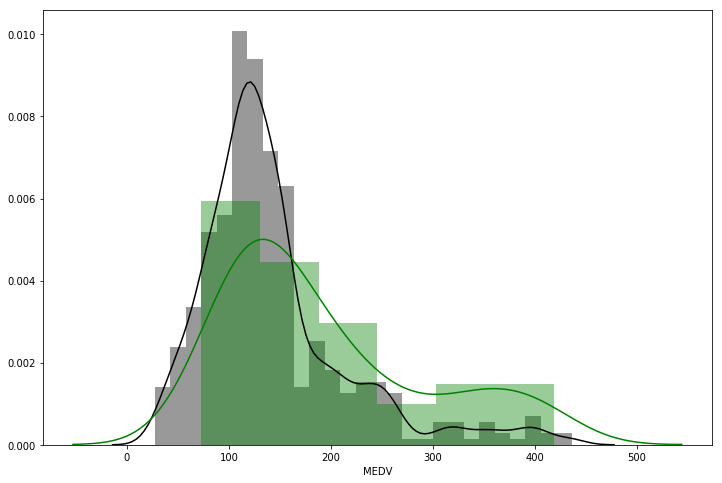

In [319]:
sns.distplot(sme_t, color='k', axlabel='MEDV') # houses close to the river are in red
sns.distplot(sme_f, color='g') # houses farther from the river are in red

## End